In [1]:
import numpy as np
import pandas as pd

!wget -q -N https://raw.githubusercontent.com/ucscXena/ucsc-xena-server/master/python/xena_query.py
import xena_query as xena

%matplotlib inline
%qtconsole --colors=linux --ConsoleWidget.font_size=12 --ConsoleWidget.font_family='Consolas'
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

In [17]:
# See what cohorts and datasets exist on a xena hub
hub = "https://xena.scellucsc.net"
print "Cohorts:", xena.all_cohorts(hub)
print "Datasets:", xena.datasets_list(hub)

Cohorts: [u'kriegsteinRadialGliaStudy1', u'treehouse_v2', u'quakeBrainGeo1']
Datasets: [u'sc000JAJ', u'sc002YED', u'treehouse_v2_clinical', u'treehouse_v2_expression']


In [3]:
# Get a list of samples and features
dataset = "sc002YED"
samples = xena.dataset_samples(hub, dataset)
print "Found {} samples: {}...".format(len(samples), samples[0:3])
features = xena.dataset_field(hub, dataset)
print "with {} features: {}...".format(len(features), features[0:3])

Found 393 samples: [u'O12-B12', u'O12-C1', u'O12-D1']...
with 49922 features: [u'ENSG00000000005', u'ENSG00000000419', u'ENSG00000000457']...


In [22]:
# Get expression vectures for a subset
X = np.array(xena.dataset_probe_values(hub, dataset, samples, features[0:10000]), dtype=np.float32).T
print X.shape
print X

(393, 10000)
[[   0.            0.            1.81190002 ...,    0.            1.99005997
     0.        ]
 [   0.            0.            2.69437003 ...,   25.20509911    0.            0.        ]
 [   0.           20.87459946    1.13622999 ...,    0.            0.            0.        ]
 ..., 
 [   1.37512004  106.36199951   32.93690109 ...,   11.84420013    0.            0.        ]
 [   0.          442.28500366    5.1620698  ...,   51.26800156
     1.44370997   66.09380341]
 [   0.           14.33390045    7.53431988 ...,    0.92351002
     1.15136003    7.71720982]]


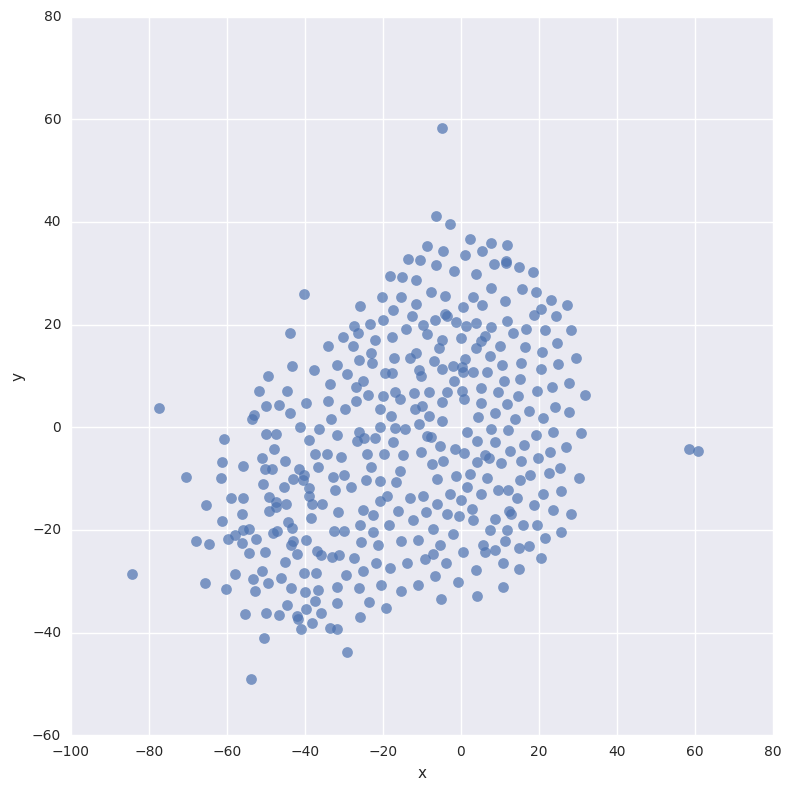

In [23]:
tsne = TSNE(n_components=2, random_state=0).fit_transform(X)
ax = sns.lmplot('x', 'y', 
                pd.DataFrame(tsne, columns=['x','y']),
                fit_reg=False, size=8, scatter_kws={'alpha':0.7,'s':60})